# 포아송 분포, 기하분호, 음이항분포, 다항분포

## 포아송분포

### scipy.stats.poisson.

### 확률질량함수 : pmf(k, mu, loc=0) --> k: 성공횟수, mu: Lamda

### 누적분포함수 : cdf(k, mu, loc=0)

### 분위수함수 : 

### 난수 : rvs(mu, loc=0, size=1, random_state=None)

$\lambda$ = 3

In [34]:
from scipy.stats import poisson as po
from scipy.stats import binom as bi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Lamda = 3
#P(X = 2) --> lambda 가 3 일 때 X = 2 일 확률
po.pmf(2, Lamda)

0.22404180765538775

확률질량함수를 그림으로 표시

In [23]:
x = np.arange(21)

In [22]:
fx = po.pmf(x, Lamda)

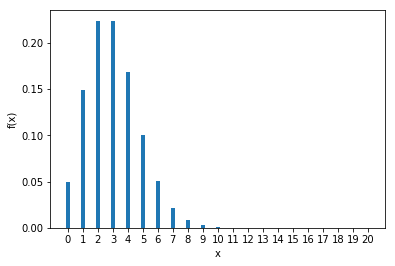

In [21]:
plt.bar(x, fx, width=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xticks(x);

In [24]:
#P(X <= 2) : X <= 2 일 확률
po.cdf(2, Lamda)

0.42319008112684364

In [25]:
#P(X > 2) : X >= 3 일 확률 =  1 - P(X <= 2)
1 - po.cdf(2, Lamda)

0.5768099188731564

### 반도체 예제의 이항분포의 경우 n 이 크면 포아송 분포로 근사 시킬 수 있음

scipy.stats.binom -   
pmf(k, n, p, loc=0) : Probability mass function   
cdf(k, n, p, loc=0) : Cumulative distribution function.

In [42]:
n = 1500
p = 1/500

In [43]:
bi.cdf(2, n, p)

0.4229658024940933

In [45]:
Lamda2 = n * p
po.cdf(2, Lamda2)

0.42319008112684364

## 기하분포 : 성공확률

scipy.stats.geom :

확률 질량함수 $$ f(k) = (1-p)^{k-1}p$$

In [64]:
from scipy.stats import geom as ge

In [91]:
p = 0.3 # 성공확률
ge.pmf(1, p)       # k : 1 번 성공할 확률

0.3

In [92]:
ge.pmf(4, p)       # 4 번 연속 성공할 확률

0.10289999999999998

In [93]:
p * (1-p)**3     # 확률 질량함수

0.10289999999999998

In [94]:
ge.cdf(6, p)      # 누적분포

0.882351

In [95]:
1 - (1-p)**6    

0.882351

## 음이항분포 (Negative Binomial)

scipy.stats.nbinom

In [114]:
from scipy.stats import nbinom as nb

In [116]:
r = 3
# P(X=4)
nb.pmf(4,r,p)

0.09724049999999995

In [117]:
# 가위, 바위, 보
nb.cdf(5, 5, 1/3)

0.21312808006909517

## 다항분포 (Multinomial Distribution)

scipy.stats.multinomial  
pmf(x, n, p)  
rvs(n, p, size=1, random_state=None)

In [121]:
from scipy.stats import multinomial as mul

In [119]:
n = 20
p = (0.3, 0.4, 0.3)   # 확률
x = [5, 6, 9]          # 5회, 6회, 9회 성공한 case
n == sum(x)

True

In [123]:
mul.pmf(x, n, p)   # 0.3 인 범주에 6 명, 0.4 인 범주에 6 명, 0.3 인 범주에 9 명이 들어갈 확률

0.015202161976806561

In [131]:
x = mul.rvs(n, p, size=1000)  # 위와 같은 시행을 50 개 구함

In [134]:
# X1 과 X2 의 상관계수
x1 = x[:,0]
x2 = x[:,1]
np.corrcoef(x1, x2)

array([[ 1.        , -0.52834039],
       [-0.52834039,  1.        ]])